# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [1]:
import cv2 # computer vision library
import helpers # .py file

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
# This variable only stores the directory of the images
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Load the datasets

These first few lines of code will load the training day/night images and store all of them in a variable, `IMAGE_LIST`. This list contains the images and their associated label ("day" or "night"). 

For example, the first image-label pair in `IMAGE_LIST` can be accessed by index: 
``` IMAGE_LIST[0][:]```.


In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## Visualize sample day and night images

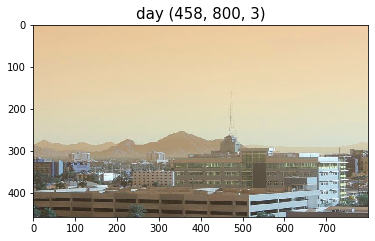

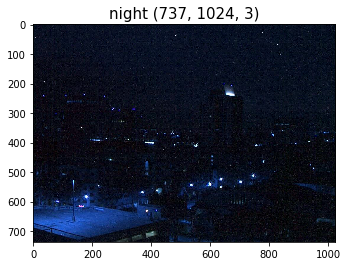

In [4]:
# ARRAY CONTAINS THE IMAGE AND THE LABEL
# Select an image and its label by list index

image_index = [1, 120] # day and night index

## TODO: Create a subplot of a day image and a night image. 
# The titles should consist of the shape and label of the image

for i in image_index:
    
    selected_image = IMAGE_LIST[i][0]
    selected_label = IMAGE_LIST[i][1]
    
    fig = plt.figure()
    a = fig.add_subplot(1, 1, 1)
    img_plot = plt.imshow(selected_image)
    title_image = str(selected_label) + ' ' + str(selected_image.shape)
    a.set_title(title_image, fontsize = 15)
    

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [5]:
# Standardize all training images

## TODO: Code the needed functions in the helpers file in order to return 
# a standardized list.
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 0


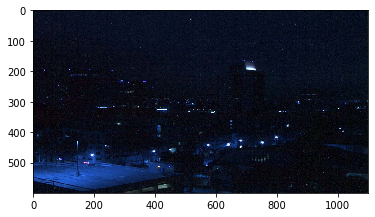

In [6]:
# Display a standardized image and its label

# Select an image by index
image_num = 120
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


---
###  Find the average brigtness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [11]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    ## TODO: Get the average brightness from an image using the HSV color space.
    width = 1100
    height = 600
    
    # Convert image to HSV
    img_hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV);
    print(img_hsv)
    
    # Add up all the pixel values in the V channel
    sum_pixels = np.sum(img_hsv[:,:,2])
    area = width * height
    
        
    # find the avg
    avg = sum_pixels/area
    
    return avg

[[[  6 159   8]
  [  6 142   9]
  [  6 142   9]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[  6 182   7]
  [  8 146   7]
  [  6 159   8]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 [[ 10 191   4]
  [  0 153   5]
  [ 10 153   5]
  ...
  [  0   0   1]
  [  0   0   1]
  [  0   0   1]]

 ...

 [[ 45 128   4]
  [ 45 128   4]
  [ 45 102   5]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 45 170   3]
  [ 45 128   4]
  [ 45 128   4]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[ 45 255   2]
  [ 45 170   3]
  [ 45 170   3]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
Avg brightness: 35.977059090909094


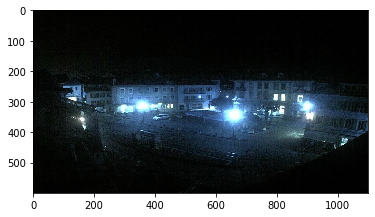

In [18]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)

# Day images have bigger avg birghtness than night images
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

# Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

---
### Build a complete classifier 

Complete this code so that it returns an estimated class label given an input RGB image.

In [46]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    ## TODO: Use the avg brightness feature to predict a label (0, 1)
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
    
    # result of image
    predicted_label = 0
    
    # Define a threshold value
    threshold = 100
    
    # if the average brightness is above the threshold value, we classify it as "day"
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    if (avg < 102):
        #  AGV less than 100 is night
        predicted_label = 0  
    elif (avg >= 102):
        predicted_label = 1
    
    return predicted_label    
    

## Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.


### Test dataset

Below, we load in the test dataset, standardize it using the `standardize` function you defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [47]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [48]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        ## TODO:
        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        # If these labels are not equal, the image has been misclassified. Append a tuple of
        # image, prediction, and true label to the misclassified list.
        if (predicted_label != true_label):
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [49]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

## TODO: Calculate the accuracy of the classifier. Accuracy = number of correct / total number of images
# Accuracy calculations
total_img = len(STANDARDIZED_TEST_LIST)
calc_correct = total_img - len(MISCLASSIFIED)
accuracy = calc_correct/total_img

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total_img))

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   3]
  [  0   0   3]
  [  0   0   3]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   3]
  [  0   0   3]
  [  0   0   3]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   1]
  ...
  [  0   0   3]
  [  0   0   3]
  [  0   0   3]]

 ...

 [[ 18  52 192]
  [ 18  54 185]
  [ 18  57 173]
  ...
  [ 94 143  25]
  [ 92 162  22]
  [ 94 170  21]]

 [[ 18  53 187]
  [ 18  55 180]
  [ 18  59 168]
  ...
  [ 94 128  28]
  [ 94 137  26]
  [ 94 149  24]]

 [[ 18  54 184]
  [ 17  58 177]
  [ 18  60 165]
  ...
  [ 94 119  30]
  [ 94 128  28]
  [ 94 132  27]]]
[[[ 12 131 173]
  [ 12 136 167]
  [ 12 144 158]
  ...
  [ 13 141 164]
  [ 13 141 164]
  [ 13 141 164]]

 [[ 12 131 173]
  [ 12 136 167]
  [ 12 144 158]
  ...
  [ 13 141 165]
  [ 13 140 166]
  [ 13 140 166]]

 [[ 12 131 173]
  [ 12 134 167]
  [ 12 144 159]
  ...
  [ 13 139 167]
  [ 13 139 167]
  [ 13 138 168]]

 ...

 [[108 209  44]
  [108 209  44]
  [108 208  43]
  ..

  [105  59 104]]]
[[[ 15 100 210]
  [ 15 100 210]
  [ 15 100 210]
  ...
  [ 15  96 202]
  [ 15  97 203]
  [ 15  97 203]]

 [[ 15 100 210]
  [ 15 100 210]
  [ 15 100 210]
  ...
  [ 15  96 204]
  [ 15  96 204]
  [ 15  96 204]]

 [[ 15 100 210]
  [ 15 100 210]
  [ 15 100 210]
  ...
  [ 15  96 205]
  [ 15  96 205]
  [ 15  96 205]]

 ...

 [[102  66 123]
  [102  67 122]
  [103  65 121]
  ...
  [105  62 196]
  [105  62 196]
  [105  63 195]]

 [[102  73 119]
  [103  69 122]
  [103  66 123]
  ...
  [105  62 196]
  [105  62 196]
  [105  62 196]]

 [[102  80 115]
  [103  74 120]
  [103  70 124]
  ...
  [105  62 196]
  [105  62 196]
  [105  62 196]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 0

  [  0   0   2]]]
[[[ 90   2 254]
  [ 90   2 254]
  [ 90   2 254]
  ...
  [ 21  78  95]
  [ 21  75  99]
  [ 21  73 102]]

 [[ 90   2 254]
  [ 90   2 254]
  [ 90   2 254]
  ...
  [ 21  77  96]
  [ 21  74 100]
  [ 21  73 102]]

 [[ 90   2 254]
  [ 90   2 254]
  [ 90   2 254]
  ...
  [ 21  76  97]
  [ 21  74 100]
  [ 20  70 102]]

 ...

 [[107  82 189]
  [107  85 183]
  [107  89 174]
  ...
  [ 90  73  42]
  [ 90  70  44]
  [ 90  67  46]]

 [[107  83 187]
  [107  86 181]
  [107  90 172]
  ...
  [ 90  65  47]
  [ 90  62  49]
  [ 90  61  50]]

 [[107  84 186]
  [107  86 180]
  [107  91 171]
  ...
  [ 90  60  51]
  [ 90  59  52]
  [ 90  58  53]]]
[[[176  66  31]
  [176  73  28]
  [176  73  28]
  ...
  [173 120  36]
  [173 121  42]
  [173 134  42]]

 [[176  62  29]
  [176  69  26]
  [176  66  27]
  ...
  [172 135  36]
  [173 113  45]
  [173 114  49]]

 [[175  57  27]
  [175  64  24]
  [175  59  26]
  ...
  [173 128  40]
  [173 114  49]
  [173 119  47]]

 ...

 [[145  73  42]
  [145  77  40]
  

  [100  31  25]]]
[[[107 119  62]
  [107 119  62]
  [107 119  62]
  ...
  [107 134  63]
  [107 134  63]
  [107 134  63]]

 [[107 119  62]
  [107 119  62]
  [107 119  62]
  ...
  [107 134  63]
  [107 134  63]
  [107 134  63]]

 [[107 119  62]
  [107 119  62]
  [107 119  62]
  ...
  [107 134  63]
  [107 134  63]
  [107 134  63]]

 ...

 [[105 147 186]
  [105 140 180]
  [105 131 170]
  ...
  [107 209 112]
  [107 209 112]
  [107 209 112]]

 [[105 133 192]
  [105 115 201]
  [105 102 198]
  ...
  [107 209 112]
  [107 209 112]
  [107 208 113]]

 [[105 113 210]
  [105  95 225]
  [105  80 225]
  ...
  [107 209 112]
  [107 209 112]
  [107 208 113]]]
[[[  0 204  15]
  [  0 204  15]
  [  0 204  15]
  ...
  [  5 191   8]
  [  5 191   8]
  [  5 191   8]]

 [[  0 207  16]
  [  0 207  16]
  [  0 207  16]
  ...
  [  5 191   8]
  [  5 191   8]
  [  5 191   8]]

 [[  0 204  15]
  [  0 204  15]
  [  0 204  15]
  ...
  [  5 191   8]
  [  5 191   8]
  [  5 191   8]]

 ...

 [[  0   0   0]
  [  0   0   0]
  

---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify.

Text(0.5, 1.0, 'Predicted: 0')

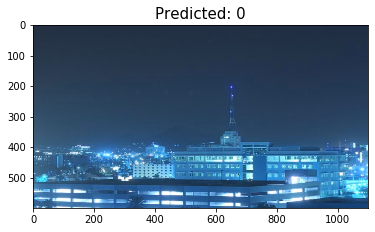

In [37]:
# Visualize misclassified example(s)
## TODO: Display an image in the `MISCLASSIFIED` list 
## TODO: Print out its predicted label - to see what the image *was* incorrectly classified as5

    
miss_image = MISCLASSIFIED[2][0]
miss_label = MISCLASSIFIED[2][1]
miss_predict = MISCLASSIFIED[2][2]
    
fig = plt.figure()
a = fig.add_subplot(1, 1, 1)
img_plot = plt.imshow(miss_image)
title_image = 'Predicted: ' + str(miss_predict)
a.set_title(title_image, fontsize = 15)
    
        